# Recommnedation Systems Poplarity and Collabarative Filtering

# Problem Statement -

Build your own recommendation system for products on an e-commerce website like Amazon.com.

# Dataset Link -

https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is

timestamp. You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has

several datasets. For this case study, we are using the Electronics dataset.

Please do the analysis based on steps( 1 to 8) as given below -

# Steps -

1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

3. Build Popularity Recommender model.

4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

5. Build Collaborative Filtering model.

6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

8. Summarise your insights.

# Please Note -

● If you are facing any memory issue while working on this project, create a small subset (Let’s say 10% of data) and work on it.

● If you are stuck at the model evaluation part of this project.

Please refer to below links -

1. https://surprise.readthedocs.io/en/stable/accuracy.html

2. http://surpriselib.com/ - Getting started, example

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
df = pd.read_csv('R6_P_ratings_electronics.csv', names=['userId', 'productId', 'ratings','timestamp'])
df

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [123]:
#dropping timestamp as it does not make sense here
df = df.drop(['timestamp'], axis=1)
df.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


(7824482, 3)


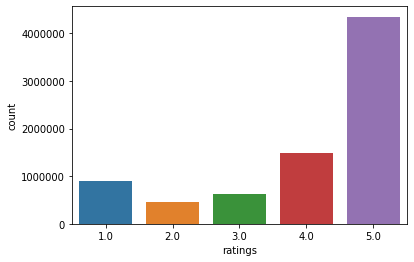

In [125]:
print(df.shape)
sns.countplot(df['ratings'])
# sns.countplot(df['userId']) ## commented as this will take lot of time and memory to run.

In [85]:
missing_values = df.columns[df.isnull().any()]
print("missing values in column : ",missing_values)
any(df['ratings']<0) # Any ratings less than 0 or negative

missing values in column :  Index([], dtype='object')


False

In [86]:
print(df['ratings'].unique())
print(df['userId'].nunique())
countdf = df.groupby('userId').count()
result = df.loc[df['userId'].isin(countdf[countdf['ratings'] > 50].index)]

[5. 1. 3. 2. 4.]
4201696


In [88]:
print(result.count())
print(result.shape)
print(result.head())

userId       122171
productId    122171
ratings      122171
dtype: int64
(122171, 3)
             userId   productId  ratings
118   AT09WGFUM934H  0594481813      3.0
177  A32HSNCNPRUMTR  0970407998      1.0
178  A17HMM1M7T9PJ1  0970407998      4.0
492  A3CLWR1UUZT6TG  0972683275      5.0
631  A3TAS1AG6FMBQW  0972683275      5.0


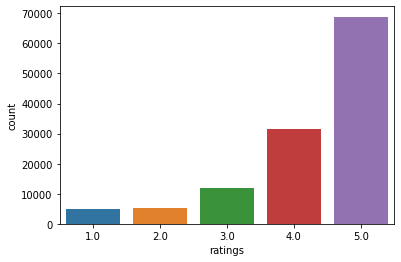

In [89]:
sns.countplot(result['ratings'])

In [92]:
df.groupby('productId')['ratings'].mean().sort_values(ascending = False).head(10)

productId
BT008V9J9U    5.0
B0058PPK8Y    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
B0058O9OR8    5.0
B0058O6O8K    5.0
B0058O6J3A    5.0
B0058O6EXA    5.0
B0058O0CMO    5.0
Name: ratings, dtype: float64

In [93]:
rating_mean_count = pd.DataFrame(df.groupby('productId')['ratings'].mean().sort_values())
rating_mean_count['rating_counts'] = pd.DataFrame(df.groupby('productId')['ratings'].count())
print(rating_mean_count.head())
rating_mean_count

            ratings  rating_counts
productId                         
B008ANKWMA      1.0              1
B0021HEJKC      1.0              1
B00FAVJXUW      1.0              1
B00J5ARFNG      1.0              1
B008LT3D6A      1.0              1


,ratings,rating_counts
productId,,
B008ANKWMA,1.0,1
B0021HEJKC,1.0,1
B00FAVJXUW,1.0,1
B00J5ARFNG,1.0,1
B008LT3D6A,1.0,1
B008LT2WZI,1.0,2
B0021MI8EA,1.0,1
B0021NN74U,1.0,1
B0000AC8A2,1.0,1


In [94]:
### Recommendation system based on minimum 20  votes to keep the weightage and printing the 10 products
min_votes = 20
mean_rating_dataset = np.mean(rating_mean_count.ratings.values)
def weighted_rating(rating_mean_count, min_votes, mean_rating_dataset):
    weighted_rating = list()
    V = rating_mean_count.rating_counts.values
    R = rating_mean_count.ratings.values
    for v, r in zip(V, R):
        if v < 5:
            weighted_rating.append(0)
        else:
            weighted_rating.append((v/(v+min_votes))*r + (min_votes/(v+min_votes))*mean_rating_dataset)
    return(weighted_rating)

rating_mean_count['weighted_rating'] = weighted_rating(rating_mean_count, min_votes, mean_rating_dataset)
rating_mean_count.weighted_rating.sort_values(ascending = False).head(10)

productId
B0043WJRRS    4.873536
B00CG70K78    4.866903
B008VGCT9K    4.855176
B007SZ0E1K    4.852439
B0033PRWSW    4.852074
B00GMRCAC6    4.849246
B003FVVMS0    4.843246
B0029N3U8K    4.840404
B0041OYTJE    4.838481
B000053HC5    4.832226
Name: weighted_rating, dtype: float64

## Collaborative Filtering

In [97]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV

In [100]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(result[['userId', 'productId', 'ratings']], reader)
trainset, testset = train_test_split(data, test_size=.15)

### Item-Item based RS

In [99]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [101]:
test_pred = algo.test(testset)

In [102]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.4457


0.4457290592312816

In [105]:
### Printing the top 5 predictions for each user based on item item collaboration filter
from collections import defaultdict
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
top_n = get_top_n(predictions, n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2TMFC9O3ZCNKE ['B001W28L2Y', 'B0072FJEA8', 'B002S53LJ2', 'B005HMKKH4', 'B000J38QBS']
A35SNSDRNE9P8Q ['B005WXQO3W', 'B0043M6F14', 'B0002Y5WZC', 'B000068O16', 'B0029N3U8K']
A2L0F2T1DLTNT8 ['B00829TIEK', 'B00HFRWWAM', 'B005O9YMM4', 'B001GIPSAW', 'B00DLKE8C2']
A2PREU4LOFQRB1 ['B00GK22DF2', 'B006Z1J2JI', 'B00EOI2SR2', 'B00168BSEW', 'B002SZEOLG']
A3QAO3QBCQF89T ['B000N99BBC', 'B008JJLW4M', 'B0081FLFQE', 'B00E3W15P0', 'B003VANO7C']
AWNJAY0M5UI70 ['B002RCNX8K', 'B0036WT4H4', 'B008R6OPJQ', 'B0036Q7MV0', 'B003LSTD38']
ADPKRJ2BSFJ0I ['B003SQEAY0', 'B0057GO0BC', 'B002GEQDK4', 'B005FRI50K', 'B009B0MZ1M']
A2X61KKXXR6WNP ['B004CLYEDC', 'B005KQ2O26', 'B001F7HLRC', 'B000N254LU', 'B008YDTRZ4']
A2DS9DLMSU2M2Z ['B001EQ4BVI', 'B004D4917W', 'B004MYFOE2', 'B000O8JZIG', 'B003WUX6PG']
AHNHLGKIZ2N3B ['B009NHWVIA', 'B0056VOM2U', 'B00BOHNYTW', 'B00D429Y12', 'B0081H8TRA']
A35HNL2VEDK9Z1 ['B000S5Q9CA', 'B00BOZ1Y46', 'B00007E89K', 'B00FOTF8M2', 'B00829THK0']
AFHYEO3Y1IIDD ['B003LVZO8S', 'B003Z6Q2JE', 'B00829TIEK', 

A1DTCJV6KOMJOA ['B00829TIEK', 'B00KHA2DQM', 'B002TLT6U8', 'B004DVEW8I', 'B003DNYW5A']
A2DF62DP20RIXF ['B008F537KC', 'B000TKHGL2', 'B00094OT36', 'B000A6NV0U', 'B0018LX0DY']
A2YRX8J4WM5BRX ['B005NCLDEC', 'B00AXTQQDS', 'B000089GN3', 'B0033160U2', 'B008B14VAK']
A141R97FHSSUQ0 ['B003VANOI6', 'B003M0NURK', 'B0041OSQ9I', 'B00GRNUO2I', 'B00BSEV682']
A8FKL1DHTHC12 ['B000AZ57M6', 'B00009XVCZ', 'B002NO7PWC', 'B003XIJ3MW', 'B002ODIE54']
A1GBU479WXR7UG ['B009LL9VDG', 'B003SQEAY0', 'B000TGC03U', 'B000I94HNO', 'B002OEBTCS']
A2CWUM49ZWMGEY ['B00005T3G0', 'B003MTTJOY', 'B0040G5KY6', 'B000MGG6SC', 'B001G4ZA6I']
A1XK4VP74IB9TQ ['B009F1DYF8', 'B007YWMCA8', 'B005CT56F8', 'B003MHUN7S', 'B0039825LM']
A35HUT8MQMT21L ['B000CKVOOY', 'B002WE6D44', 'B0064PKG3Q', 'B000085BD8', 'B00009RDIF']
AG5WSXI52FPKH ['B000ETVKHE', 'B00E0EY7Z6', 'B001FA1NZK', 'B002RM08RE', 'B002IO2UM2']
AE88D7OM7YU99 ['B001S0PWWC', 'B00EOE4G4E', 'B002LEVGMO', 'B008D97LNE', 'B00APQM1GU']
A13QOK3SKIT9QL ['B000ID37EA', 'B0079X1VQS', 'B000AYJDD6',

### User-User based RS

In [106]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [107]:
test_pred = algo.test(testset)
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0613


1.0612622111406174

### Print Top 5 predictions for each user based on User - User Collaboration

In [108]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2TMFC9O3ZCNKE ['B001W28L2Y', 'B0072FJEA8', 'B002S53LJ2', 'B005HMKKH4', 'B000J38QBS']
A35SNSDRNE9P8Q ['B005WXQO3W', 'B0043M6F14', 'B0002Y5WZC', 'B000068O16', 'B0029N3U8K']
A2L0F2T1DLTNT8 ['B00829TIEK', 'B00HFRWWAM', 'B005O9YMM4', 'B001GIPSAW', 'B00DLKE8C2']
A2PREU4LOFQRB1 ['B00GK22DF2', 'B006Z1J2JI', 'B00EOI2SR2', 'B00168BSEW', 'B002SZEOLG']
A3QAO3QBCQF89T ['B000N99BBC', 'B008JJLW4M', 'B0081FLFQE', 'B00E3W15P0', 'B003VANO7C']
AWNJAY0M5UI70 ['B002RCNX8K', 'B0036WT4H4', 'B008R6OPJQ', 'B0036Q7MV0', 'B003LSTD38']
ADPKRJ2BSFJ0I ['B003SQEAY0', 'B0057GO0BC', 'B002GEQDK4', 'B005FRI50K', 'B009B0MZ1M']
A2X61KKXXR6WNP ['B004CLYEDC', 'B005KQ2O26', 'B001F7HLRC', 'B000N254LU', 'B008YDTRZ4']
A2DS9DLMSU2M2Z ['B001EQ4BVI', 'B004D4917W', 'B004MYFOE2', 'B000O8JZIG', 'B003WUX6PG']
AHNHLGKIZ2N3B ['B009NHWVIA', 'B0056VOM2U', 'B00BOHNYTW', 'B00D429Y12', 'B0081H8TRA']
A35HNL2VEDK9Z1 ['B000S5Q9CA', 'B00BOZ1Y46', 'B00007E89K', 'B00FOTF8M2', 'B00829THK0']
AFHYEO3Y1IIDD ['B003LVZO8S', 'B003Z6Q2JE', 'B00829TIEK', 

AN9CP6J4JF91X ['B00483WRZ6', 'B00007EDZG', 'B0000AI0N1', 'B00004T8R2', 'B007WTAJTO']
AWPN47SSWK1JV ['B002MPPHKY', 'B009LL9VDG', 'B009O412AU', 'B0036WT3V6', 'B001NPDKTY']


### Additional Matrix Factorization using K-Fold, SVD and gridsearch to find the best and worst prediction

In [109]:
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9819
RMSE: 0.9789
RMSE: 0.9904


In [110]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9870764336647752
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [111]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,A12DQZKRKTNF5E,B00AZW4MYI,5.0,4.263404,{'was_impossible': False},175,9,0.736596
1,A1OMXVXXP07F05,B00395ZQMK,5.0,4.014229,{'was_impossible': False},69,5,0.985771
2,AWSK1ZAEU1KFL,B001FO2VDO,3.0,3.727312,{'was_impossible': False},47,1,0.727312
3,A3BVN2QBNPBHCR,B007R8U5R6,5.0,4.915281,{'was_impossible': False},71,4,0.084719
4,A1FR68QH6Z4YZM,B00005UOSN,5.0,4.647241,{'was_impossible': False},89,2,0.352759


In [112]:
best_predictions = df.sort_values(by='err')[:10] # To print top 10 best predictions
# best_predictions = df.sort_values(by='err')[:] # To print all the predictions
worst_predictions = df.sort_values(by='err')[-10:]

In [113]:
best_predictions
# best_predictions.groupby('uid').head(100) ## Get all the predictions and group by user id

,uid,iid,rui,est,details,Iu,Ui,err
32798,A2HRHF83I3NDGT,B006W8U2MU,5.0,5.0,{'was_impossible': False},87,41,0.0
31462,A200DY76VXVGP9,B00AEGRGNO,5.0,5.0,{'was_impossible': False},40,3,0.0
22775,A3P4T1DKRWTL36,B00BW6KCTU,5.0,5.0,{'was_impossible': False},26,12,0.0
12864,A54SG05AV6S4H,B003OC6LWM,5.0,5.0,{'was_impossible': False},48,8,0.0
38092,A2NOW4U7W3F7RI,B00212NO6W,5.0,5.0,{'was_impossible': False},188,16,0.0
34349,A2PB325LKXYDOL,B0000AZK4G,5.0,5.0,{'was_impossible': False},40,7,0.0
39921,A64LEAZ2QF8L2,B0001HWL9A,5.0,5.0,{'was_impossible': False},46,3,0.0
5856,A3PCEB9ND82AGE,B007WTAJTO,5.0,5.0,{'was_impossible': False},42,104,0.0
15177,APOGXH3A74CM3,B00006B7DA,5.0,5.0,{'was_impossible': False},58,13,0.0
2308,A3GQY0TFRG0MPZ,B003VAHYNC,5.0,5.0,{'was_impossible': False},33,18,0.0


### Summarizing the project
1. The recommendation system is simple to build but is common for all. It can run on larger datasets.
2. The Collabaration based RS using Item-Item and User-User based takes time to run on larger dataset and hence need to split out to smaller dataset to run.
3. The prediction using User-User based is similar to Item-Item based but is more accurate to user.
4. The Collabarated RS model cannot be realtime as the model building takes time with larger dataset.
